<a href="https://colab.research.google.com/github/anoushkrit/Biomedical-Text-Analytics/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biomedical Text Analytics


## Importing the Libraries


In [2]:
""" Created on 4 April 2019,
Modified on 26 April 2019

@Author: Anoushkrit Goel 
"""
!pip install syspath
import sys
!pip install re2
import re
import numpy as np

!pip install pprint 
from pprint import pprint
import pandas as pd
# Bio
!pip install biopython
!pip install bio

import bio
from Bio import Entrez, Medline



# Gensim
!pip install gensim 
import gensim
import gensim.corpora as corpora 
from gensim.utils import simple_preprocess

from gensim.models import CoherenceModel # Coherence Model may not be used

# spacy for Lemmatization
!pip install spacy
!python -m spacy download en
import spacy

#Plotting Tools
!pip install pyLDAvis
import pyLDAvis 
import pyLDAvis.gensim #crucial step 
import matplotlib.pyplot as plt
%matplotlib inline

!pip install seaborn
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

# Network Visualisation 
!pip install networkx
import networkx as nx

#Quality Analysis and Testing Purposes
!pip install logging 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

!pip install pytest-warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# File Conversion 
!pip install python-csv
!pip install jsonlib

import csv
import json
!pip install collections-extended
from collections import Counter
from collections import defaultdict

# Email for PubMed Verification 
Entrez.email = "anoushkritgoel@gmail.com"

  Using cached https://files.pythonhosted.org/packages/14/b0/e3476ed13e60fc7fb0d172926809c53be7a8d02f14191ada449a6d572dcb/re2-0.2.24.tar.gz
  Failed building wheel for re2
  Running setup.py clean for re2
Failed to build re2
  Running setup.py install for re2 ... error
Command "/usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-9zuwhi9r/re2/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-record-n2ameskt/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /tmp/pip-install-9zuwhi9r/re2/


/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')



    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')

  Using cached https://files.pythonhosted.org/packages/93/4b/979db9e44be09f71e85c9c8cfc42f258adfb7d93ce01deed2788b2948919/logging-0.4.9.6.tar.gz
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-p5udq3t_/logging/
  Using cached https://files.pythonhosted.org/packages/7c/55/19c29fd79dfb5d42f4568feedc5a286d01d0683a372c1e19024531576508/jsonlib-1.6.1.tar.gz
  Failed building wheel for jsonlib
  Running setup.py clean for jsonlib
Failed to build jsonlib
  Running setup.py install for jsonlib ... error
Command "/usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-ghlh_y9g/jsonlib/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-r

### Search Database
Function to search the respective database.

In [0]:
def searchpubmed(return_max= None, database=None, searchqueryinput=None):
  print('Search' + database)
  if searchqueryinput:
    searchquery = searchqueryinput
  handle = Entrez.esearch(db=database, term=searchquery, retmax=return_max)  # retmax is 20 by esearch default
  queryresponse = Entrez.read(handle)
  handle.close()
  print("\n" + queryresponse['Count'] + " results available for \'" + str(searchquery) + "\', returning " + str(
        return_max))
  queryids = (searchquery, queryresponse['IdList'])
  return queryids

###Fetch Record


In [0]:
def fetchrecord(inputids, numberofrecs, queryinput):
    print('Downloading Pubmed Records...')
    handle = Entrez.efetch(database, id=str(inputids), rettype="medline", retmode="text")
    records = Medline.parse(handle)
    records = list(records)
    recordsdf = pd.DataFrame(records)
    print('\nFeatures available: {}'.format(recordsdf.columns.values.tolist()))
    recordsdf['Searched'] = str(queryinput)
    reckeys = ['PMID', 'TI', 'AB', 'DP', 'PHST', 'Searched']
    print("\nReturning {} features : {} ".format((len(reckeys) - 1), reckeys[0:(len(reckeys) - 1)]))
    recordsselectdf = recordsdf[reckeys]
    
    recordsdf.to_json('full_records' + str(numberofrecs) + '.json')
    recordsselectdf.to_json('selected_records' + str(numberofrecs) + '.json')
    return recordsselectdf

In [5]:
numberofrecs= input("Number of records?")
queryinput= input("Which disease you want to visualize?")
database = input("Which database to refer?")
inputids = searchpubmed(return_max=numberofrecs, database=database, searchqueryinput=queryinput)
fetchrecord(inputids, numberofrecs, queryinput)

Number of records?100
Which disease you want to visualize?Diabetes
Which database to refer?pubmed
Searchpubmed

666131 results available for 'Diabetes', returning 100

Features available: ['AB', 'AD', 'AID', 'AU', 'AUID', 'CI', 'CN', 'COIS', 'CON', 'CRDT', 'DEP', 'DP', 'EDAT', 'FAU', 'GR', 'IP', 'IS', 'JID', 'JT', 'LA', 'LID', 'LR', 'MHDA', 'OAB', 'OABL', 'OT', 'OTO', 'OWN', 'PG', 'PHST', 'PL', 'PMC', 'PMCR', 'PMID', 'PST', 'PT', 'SI', 'SO', 'STAT', 'TA', 'TI', 'TT', 'VI']

Returning 5 features : ['PMID', 'TI', 'AB', 'DP', 'PHST'] 


,PMID,TI,AB,DP,PHST,Searched
0,31022674,Gender- and age-dependencies of oxidative stre...,"Recently, Weber et al. published a thorough in...",2019 Apr 15,"[2019/02/25 00:00 [received], 2019/03/20 00:00...",Diabetes
1,31022565,Network pharmacology-based analysis on bioacti...,ETHNOPHARMACOLOGICAL RELEVANCE: Potentilla dis...,2019 Apr 22,"[2018/12/12 00:00 [received], 2019/03/27 00:00...",Diabetes
2,31022564,Anti-diabetic and renoprotective effects of Ca...,"ETHNOPHARMACOLOGICAL RELEVANCE: Cassiae Semen,...",2019 Apr 22,"[2019/01/26 00:00 [received], 2019/04/08 00:00...",Diabetes
3,31022553,Enhancer long-range contacts: The multi-adapto...,The eukaryotic genome is organized at varying ...,2019 Apr 22,"[2019/02/15 00:00 [received], 2019/04/03 00:00...",Diabetes
4,31022479,Aqueous extract of Salvia miltiorrhiza Bunge-R...,Vascular diabetic complications are the leadin...,2019 Apr 22,"[2019/01/08 00:00 [received], 2019/04/12 00:00...",Diabetes
5,31022398,Decreased lysyl oxidase level protects against...,Retinal capillary basement membrane (BM) thick...,2019 Apr 22,"[2018/11/07 00:00 [received], 2019/02/19 00:00...",Diabetes
6,31022340,"Discovery of Potent, Selective and Short-Actin...","The vasopressin analogue desmopressin (dDAVP, ...",2019 Apr 25,"[2019/04/26 06:00 [entrez], 2019/04/26 06:00 [...",Diabetes
7,31022339,Promoting Healthy Eating Among African-America...,The prevention of obesity is vital to the heal...,2018 Dec,"[2019/04/26 06:00 [entrez], 2019/04/26 06:00 [...",Diabetes
8,31022200,Association between ultraviolet radiation expo...,PURPOSE: We investigated associations between ...,2019,"[2019/01/18 00:00 [received], 2019/03/29 00:00...",Diabetes
9,31022172,On the utilization of polygenic risk scores fo...,The promise of personalized genomic medicine i...,2019 Apr,"[2019/04/26 06:00 [entrez], 2019/04/26 06:00 [...",Diabetes


### NLTK Stop Words


In [6]:
# NLTK Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
## This is respective of the corpus and the domain from which the individual is fetching data
stop_words.extend(['from']) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### CSV to JSON

In [0]:
def csv_json(csv=None,json='pubmed.json' ):
    csvfile = open(csv, 'r')
    jsonfile = open(json, 'w')
    ### Specify the field names based on the Headers required
    ### For Medical Literature headers lije
    fieldnames = ("PMID", "TI", "AB", "DP", "PHST")
    reader = csv.DictReader( csvfile, fieldnames)
    out = json.dumps( [ row for row in reader ] )
    jsonfile.write(out)
    return json

##Importing Dataset
The dataset needs to be imported in JSON format and not in .CSV as the JSON provides us more flexibility with data by asssigning asymmetric value allocation in each and every cell unit.

In [7]:
# Import Dataset
#### Specify the CSV name and JSON made
df = pd.read_json('selected_records' + str(numberofrecs) + '.json')
# df = df.loc[df.isin(['PMID', 'TI', 'AB', 'DP']) , :]
print(df.shape)  #> (2361, 3)
df.head()

(100, 6)


,PMID,TI,AB,DP,PHST,Searched
0,31022674,Gender- and age-dependencies of oxidative stre...,"Recently, Weber et al. published a thorough in...",2019 Apr 15,"[2019/02/25 00:00 [received], 2019/03/20 00:00...",Diabetes
1,31022565,Network pharmacology-based analysis on bioacti...,ETHNOPHARMACOLOGICAL RELEVANCE: Potentilla dis...,2019 Apr 22,"[2018/12/12 00:00 [received], 2019/03/27 00:00...",Diabetes
10,31022160,Long-Term Intensive Lifestyle Intervention Pro...,BACKGROUND Diabetic nephropathy (DN) is a pote...,2019 Apr 25,"[2019/04/26 06:00 [entrez], 2019/04/26 06:00 [...",Diabetes
11,31022110,Influence of blood pressure on the effects of ...,OBJECTIVE: We examined whether the efficacy of...,2019 Jun,"[2019/04/26 06:00 [entrez], 2019/04/26 06:00 [...",Diabetes
12,31022099,Preventing Diabetes in the Workplace: Effects ...,OBJECTIVE: Prevention of diabetes demonstrated...,2019 Apr 19,"[2019/04/26 06:00 [entrez], 2019/04/26 06:00 [...",Diabetes


### Tokenize Sentences and Cleaning

In [0]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  


In [30]:
# Convert to list
df['content'] = df['AB'] + df['TI']
data = df.content.values.tolist()
data_words = list(sent_to_words(df.content.apply(str)))
pprint(data[:1])

# for x,row in df.iterrows():
  # content = df['AB']+df['TI']
  #content = str(content)
  # print(content)
  #data = df.content.values.tolist()
  #data_words = list(sent_to_words(content))
  #print(data_words)


['Recently, Weber et al. published a thorough investigation of the '
 'age-dependency of oxidative stress (OS) determined by the steady state '
 'concentrations of different compounds - oxidation products and antioxidants '
 '- that are in common use as biomarkers of OS in 2207 healthy individuals of '
 'the cross-sectional MARK-AGE Project. The correlations among biomarkers were '
 'significant but weak. These findings may indicate different manifestations '
 'of OS and must further be evaluated. Here, we report a refined analysis of '
 'OS based on the above-mentioned original data. We show that malondialdehyde '
 '(MDA) appears to be sensitive to both gender and age. It is significantly '
 'lower and shows a greater age-dependence in women than in men. The '
 'age-dependency of MDA in women arises in a stepwise fashion. The '
 'age-dependent slope of the steady state concentration is maximal at the age '
 'between 50 and 55 years, indicating that it may be attributed to the change '

In [38]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['recently', 'weber', 'et', 'al', 'published', 'thorough', 'investigation', 'of', 'the', 'age', 'dependency', 'of', 'oxidative', 'stress', 'os', 'determined', 'by', 'the', 'steady', 'state', 'concentrations', 'of', 'different', 'compounds', 'oxidation', 'products', 'and', 'antioxidants', 'that', 'are', 'in', 'common', 'use', 'as', 'biomarkers', 'of', 'os', 'in', 'healthy', 'individuals', 'of', 'the', 'cross', 'sectional', 'mark', 'age', 'project', 'the', 'correlations', 'among', 'biomarkers', 'were', 'significant', 'but', 'weak', 'these', 'findings', 'may', 'indicate', 'different', 'manifestations', 'of', 'os', 'and', 'must', 'further', 'be', 'evaluated', 'here', 'we', 'report', 'refined', 'analysis', 'of', 'os', 'based', 'on', 'the', 'above', 'mentioned', 'original', 'data', 'we', 'show', 'that', 'malondialdehyde', 'mda', 'appears', 'to', 'be', 'sensitive', 'to', 'both', 'gender', 'and', 'age', 'it', 'is', 'significantly', 'lower', 'and', 'shows', 'greater', 'age', 'dependence', 'in'

###BI-GRAM and TRI-GRAM Models

In [40]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/l

###Build the Topic Model

In [41]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.019*"diabetic" + 0.010*"cell" + 0.009*"receptor" + 0.008*"mouse" + '
  '0.008*"glucose" + 0.008*"effect" + 0.008*"insulin" + 0.007*"protein" + '
  '0.007*"expression" + 0.007*"propionate"'),
 (1,
  '0.015*"care" + 0.010*"use" + 0.010*"base" + 0.010*"prediabete" + '
  '0.010*"diabetes" + 0.008*"test" + 0.007*"system" + 0.007*"clinical" + '
  '0.006*"clinician" + 0.006*"support"'),
 (2,
  '0.014*"level" + 0.013*"gdm" + 0.012*"health" + 0.011*"use" + '
  '0.009*"weight_gain" + 0.009*"associate" + 0.008*"study" + 0.008*"type" + '
  '0.008*"age" + 0.008*"pregnancy"'),
 (3,
  '0.043*"patient" + 0.019*"group" + 0.017*"study" + 0.014*"high" + '
  '0.014*"risk" + 0.010*"year" + 0.009*"low" + 0.009*"result" + 0.009*"factor" '
  '+ 0.008*"disease"')]


###Dominant Topic Extraction
Determining the Dominant Topic and further calculating the percentage contribution in each document.

In [42]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9332,"level, gdm, health, use, weight_gain, associate, study, type, age, pregnancy","[recently, weber, publish, thorough, investigation, age, dependency, determine, steady, state, c..."
1,1,0.0,0.9317,"diabetic, cell, receptor, mouse, glucose, effect, insulin, protein, expression, propionate","[relevance, potentilla, discolor, bunge, pdb, commonly, use, herbal, alleviate, diabetes, mellit..."
2,2,3.0,0.7948,"patient, group, study, high, risk, year, low, result, factor, disease","[background, diabetic, nephropathy, dn, potentially, fatal, complication, diabetes, mellitus, li..."
3,3,3.0,0.9873,"patient, group, study, high, risk, year, low, result, factor, disease","[objective, examine, efficacy, low, dose, acetylsalicylic, acid, aspirin, primary, prevention, c..."
4,4,1.0,0.5281,"care, use, base, prediabete, diabetes, test, system, clinical, clinician, support","[objective, prevention, diabete, demonstrate, diabetes, prevention, program, thoroughly, evaluat..."
5,5,0.0,0.2500,"diabetic, cell, receptor, mouse, glucose, effect, insulin, protein, expression, propionate",[]
6,6,2.0,0.9950,"level, gdm, health, use, weight_gain, associate, study, type, age, pregnancy","[background, vitamin, status, pregnancy, may, influence, risk, prematurity, birth, size, child, ..."
7,7,2.0,0.9361,"level, gdm, health, use, weight_gain, associate, study, type, age, pregnancy","[postpartum, period, represent, critical, window, initiate, target, intervention, improve, cardi..."
8,8,2.0,0.9557,"level, gdm, health, use, weight_gain, associate, study, type, age, pregnancy","[obesity, affect, woman, aged, year, united, state, article, summarize, recent, research, obesit..."
9,9,2.0,0.9932,"level, gdm, health, use, weight_gain, associate, study, type, age, pregnancy","[perinatal, neonatal, nurse, critical, role, play, effectively, address, prevalence, adverse, pr..."


###How can I tell about a topic in one sentence?


In [43]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9960,"diabetic, cell, receptor, mouse, glucose, effect, insulin, protein, expression, propionate","[high, hdl, main, protein, apolipoprotein, ai, apoai, establish, benefit, various, cell, cytopro..."
1,1.0,0.9072,"care, use, base, prediabete, diabetes, test, system, clinical, clinician, support","[alignment, base, gene, identification, method, utilize, sequence, conservation, orthologous, pr..."
2,2.0,0.9950,"level, gdm, health, use, weight_gain, associate, study, type, age, pregnancy","[background, vitamin, status, pregnancy, may, influence, risk, prematurity, birth, size, child, ..."
3,3.0,0.9964,"patient, group, study, high, risk, year, low, result, factor, disease","[background, sitagliptin, first, dipeptidyl, peptidase, inhibitor, demonstrate, efficacy, safety..."


###Frequency Distribution of Word Counts in Documents

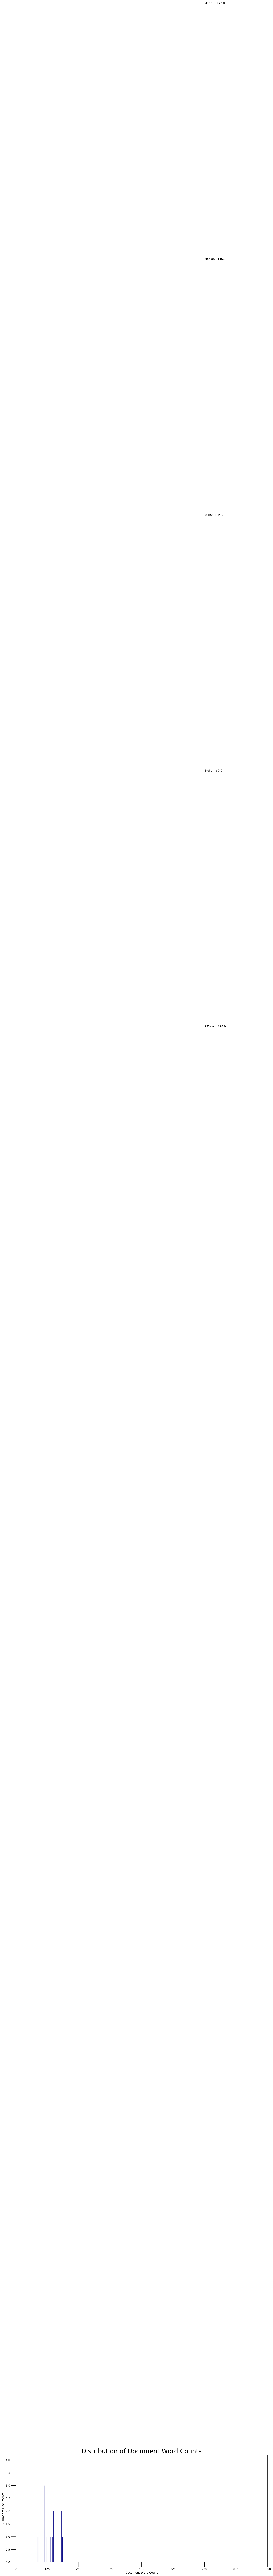

In [44]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

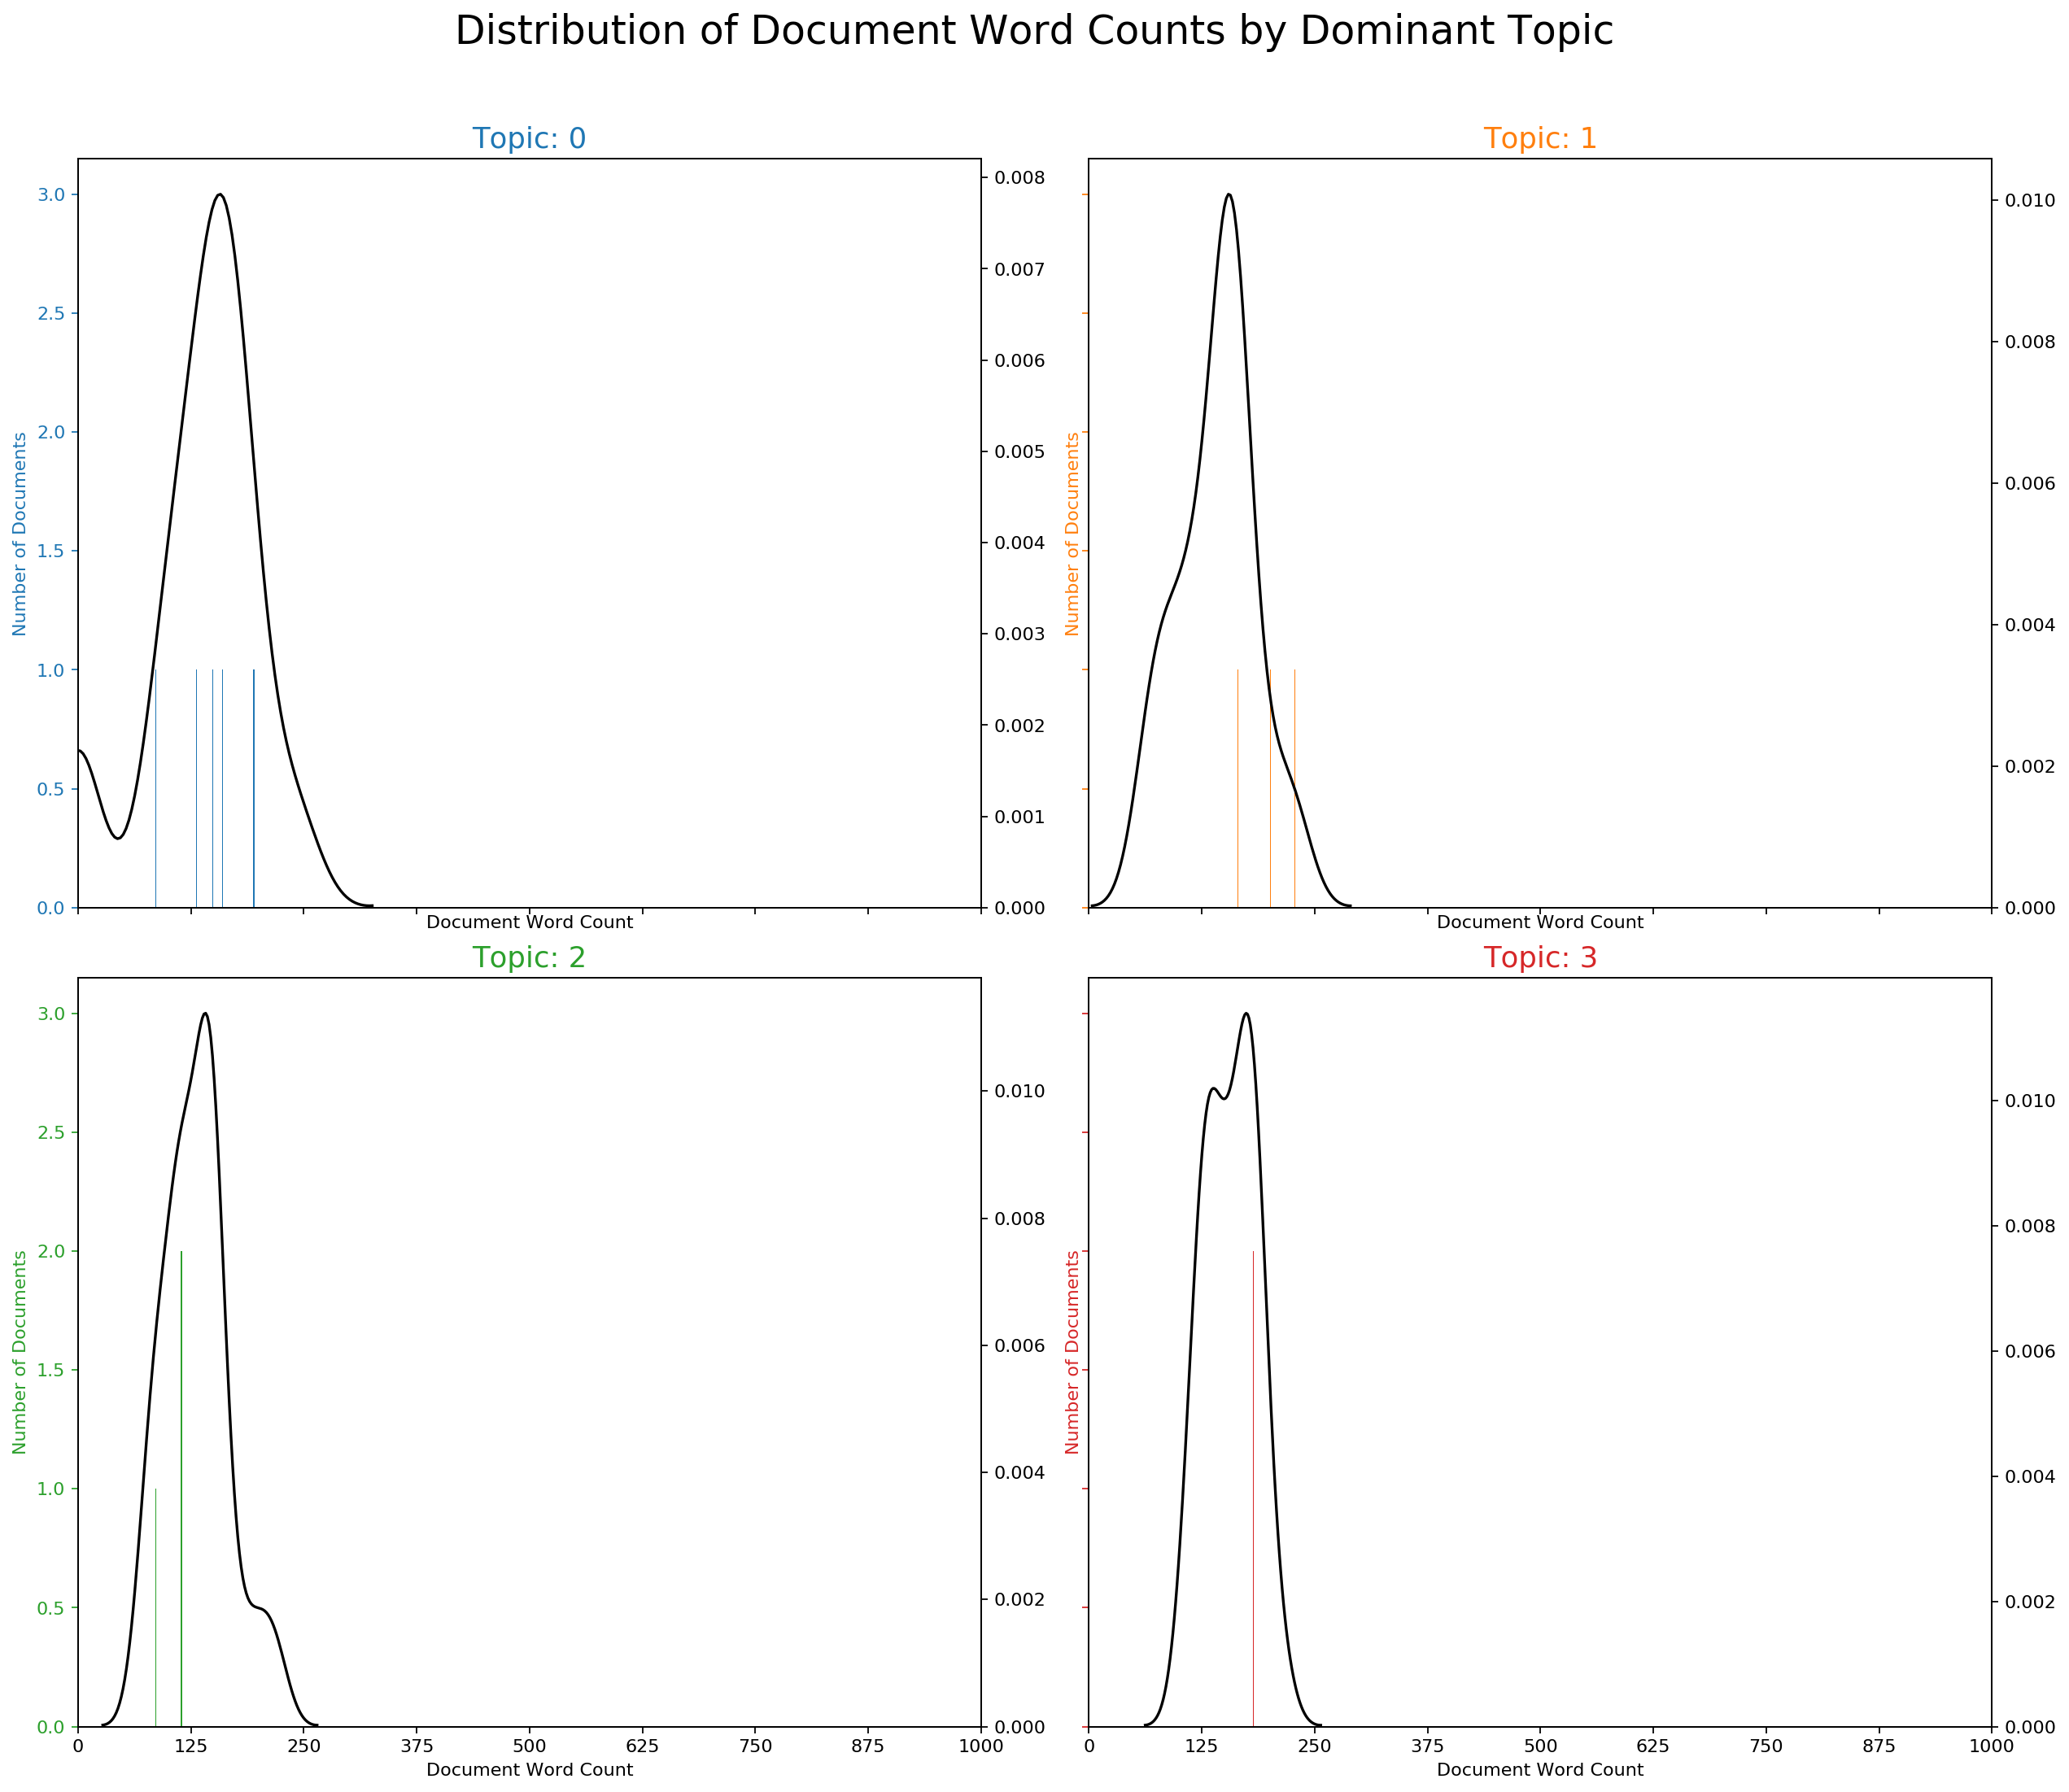

In [45]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

###Word Clouds of Top N Keywords in Each Topic

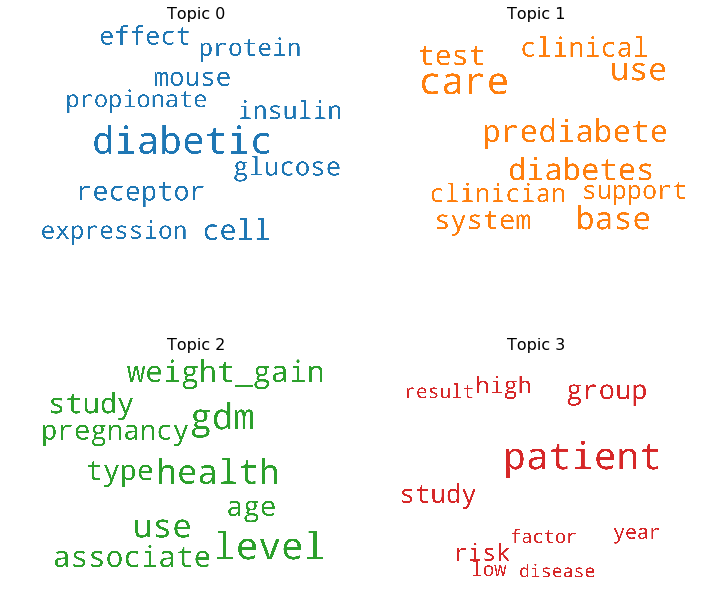

In [46]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

###Word Counts of Topic Keywords

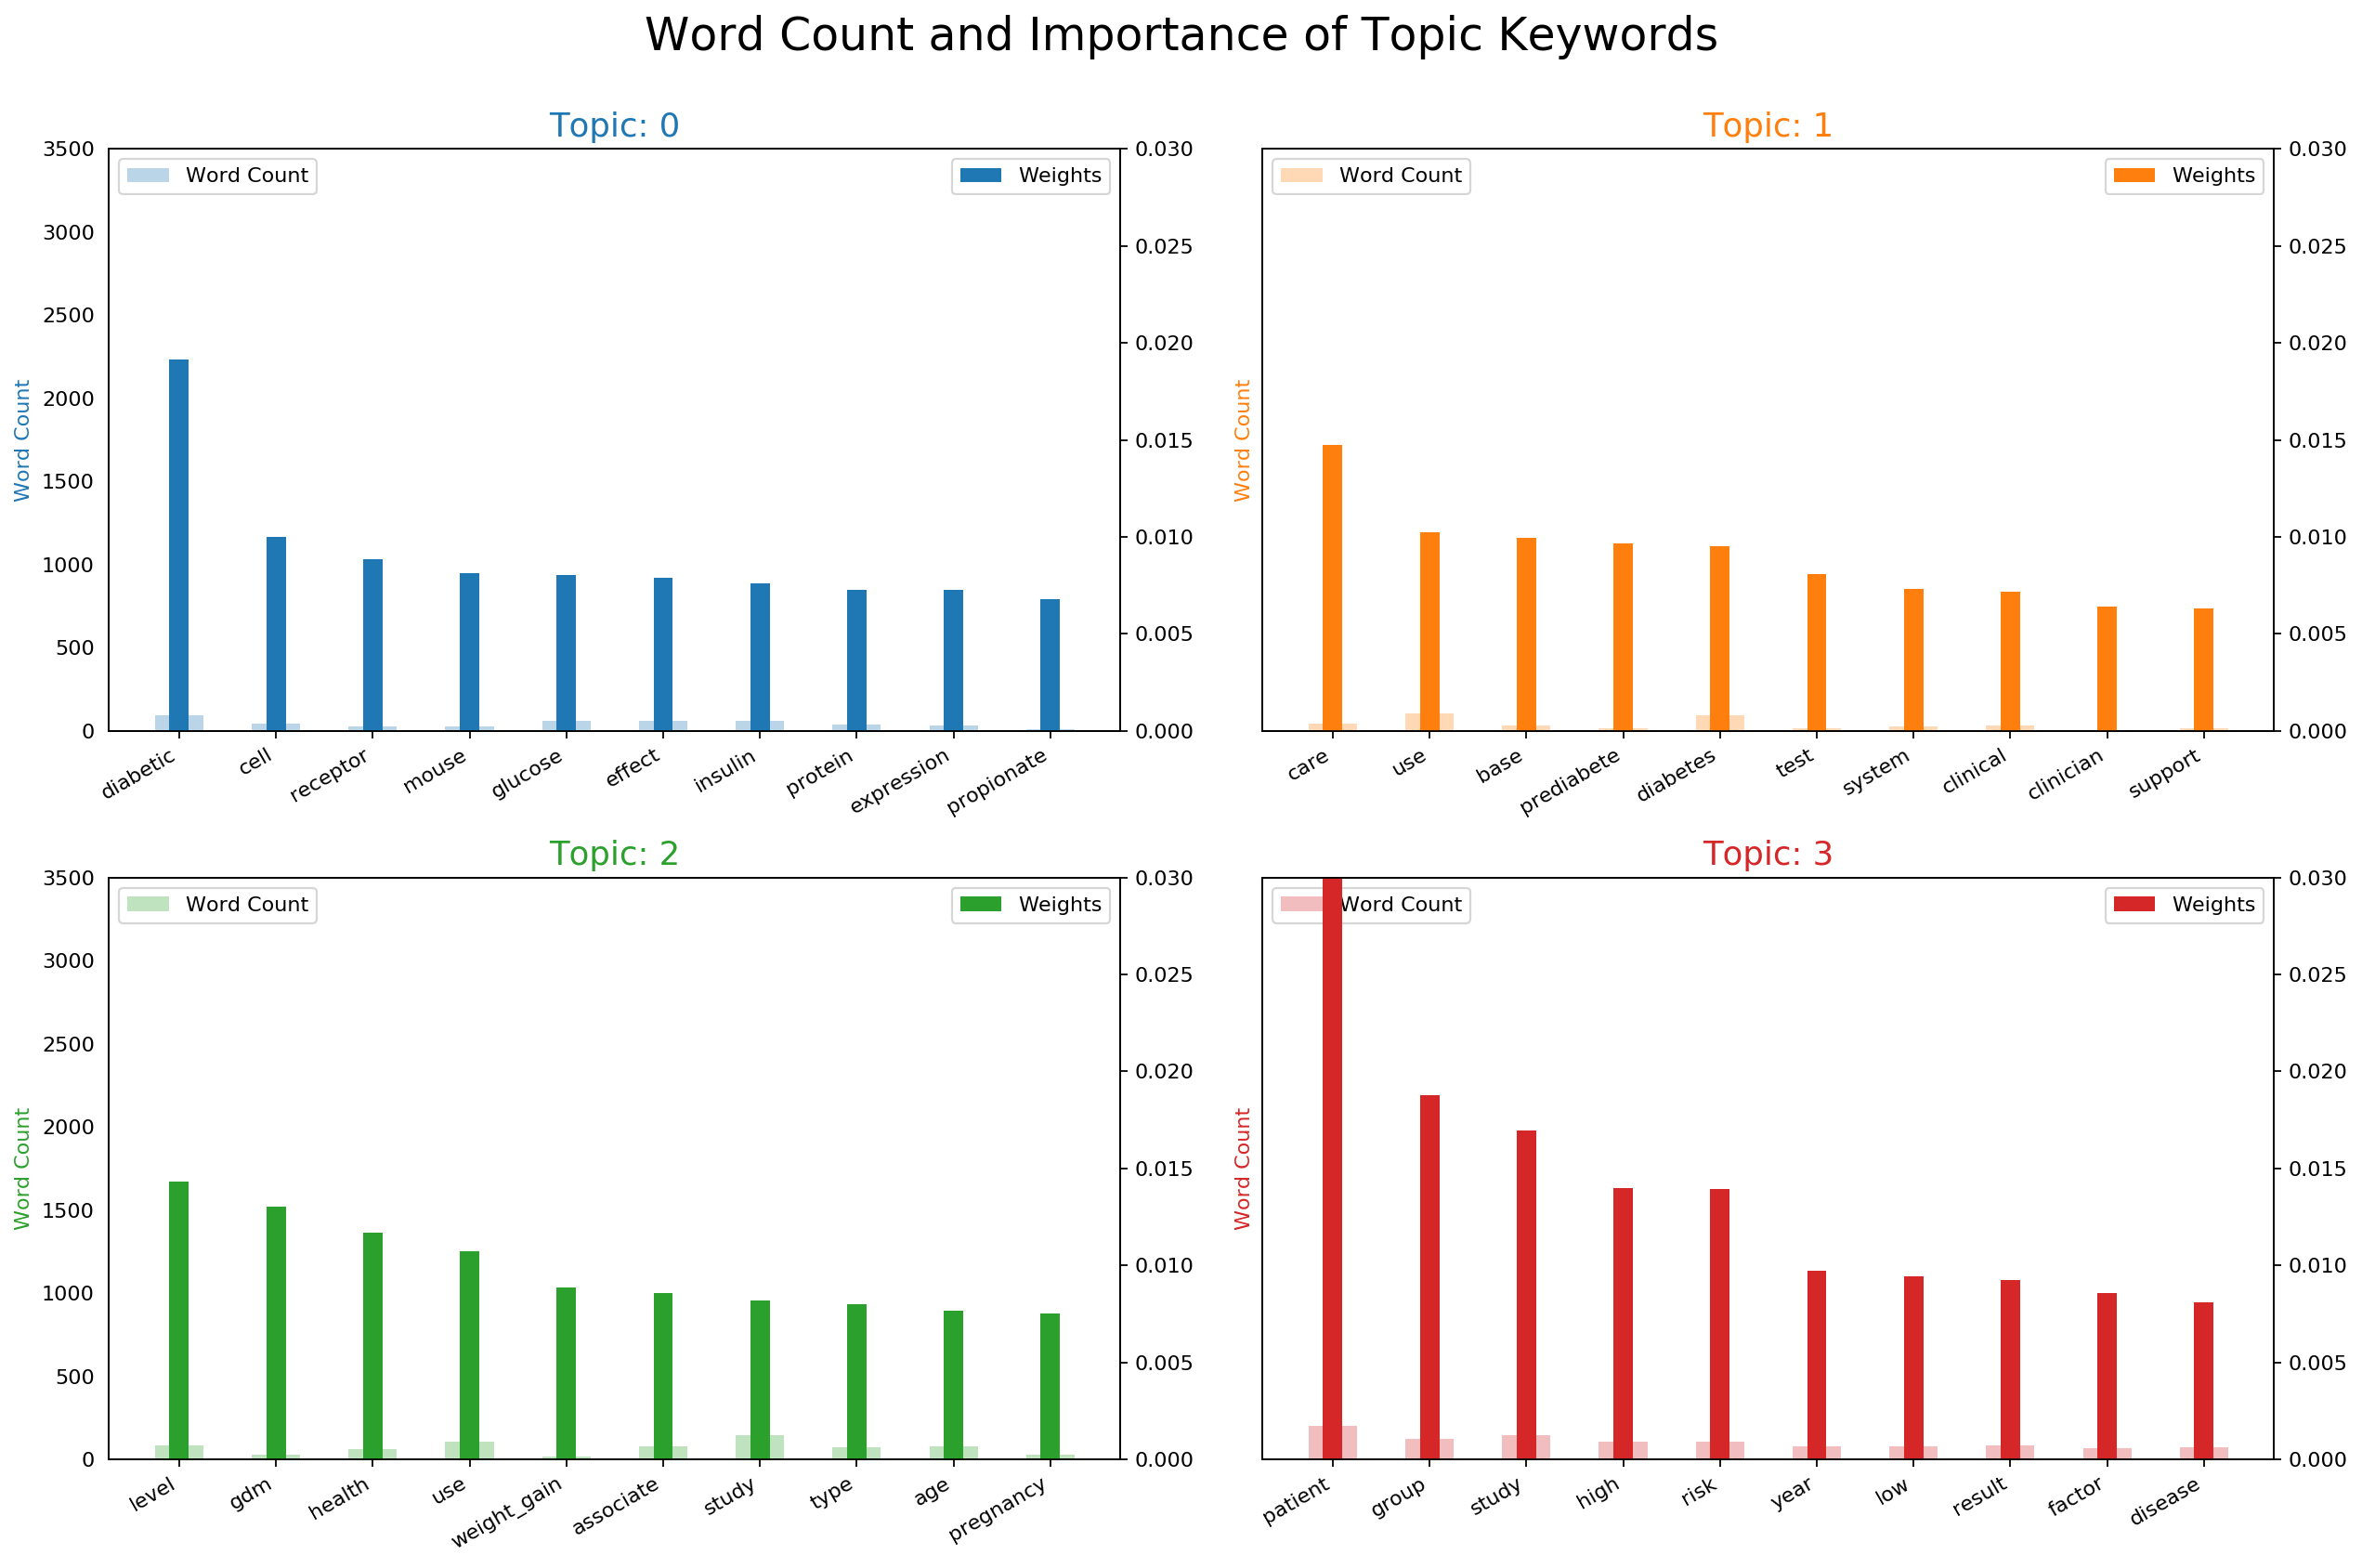

In [47]:

topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

###Sentence Chart Colored by Topic

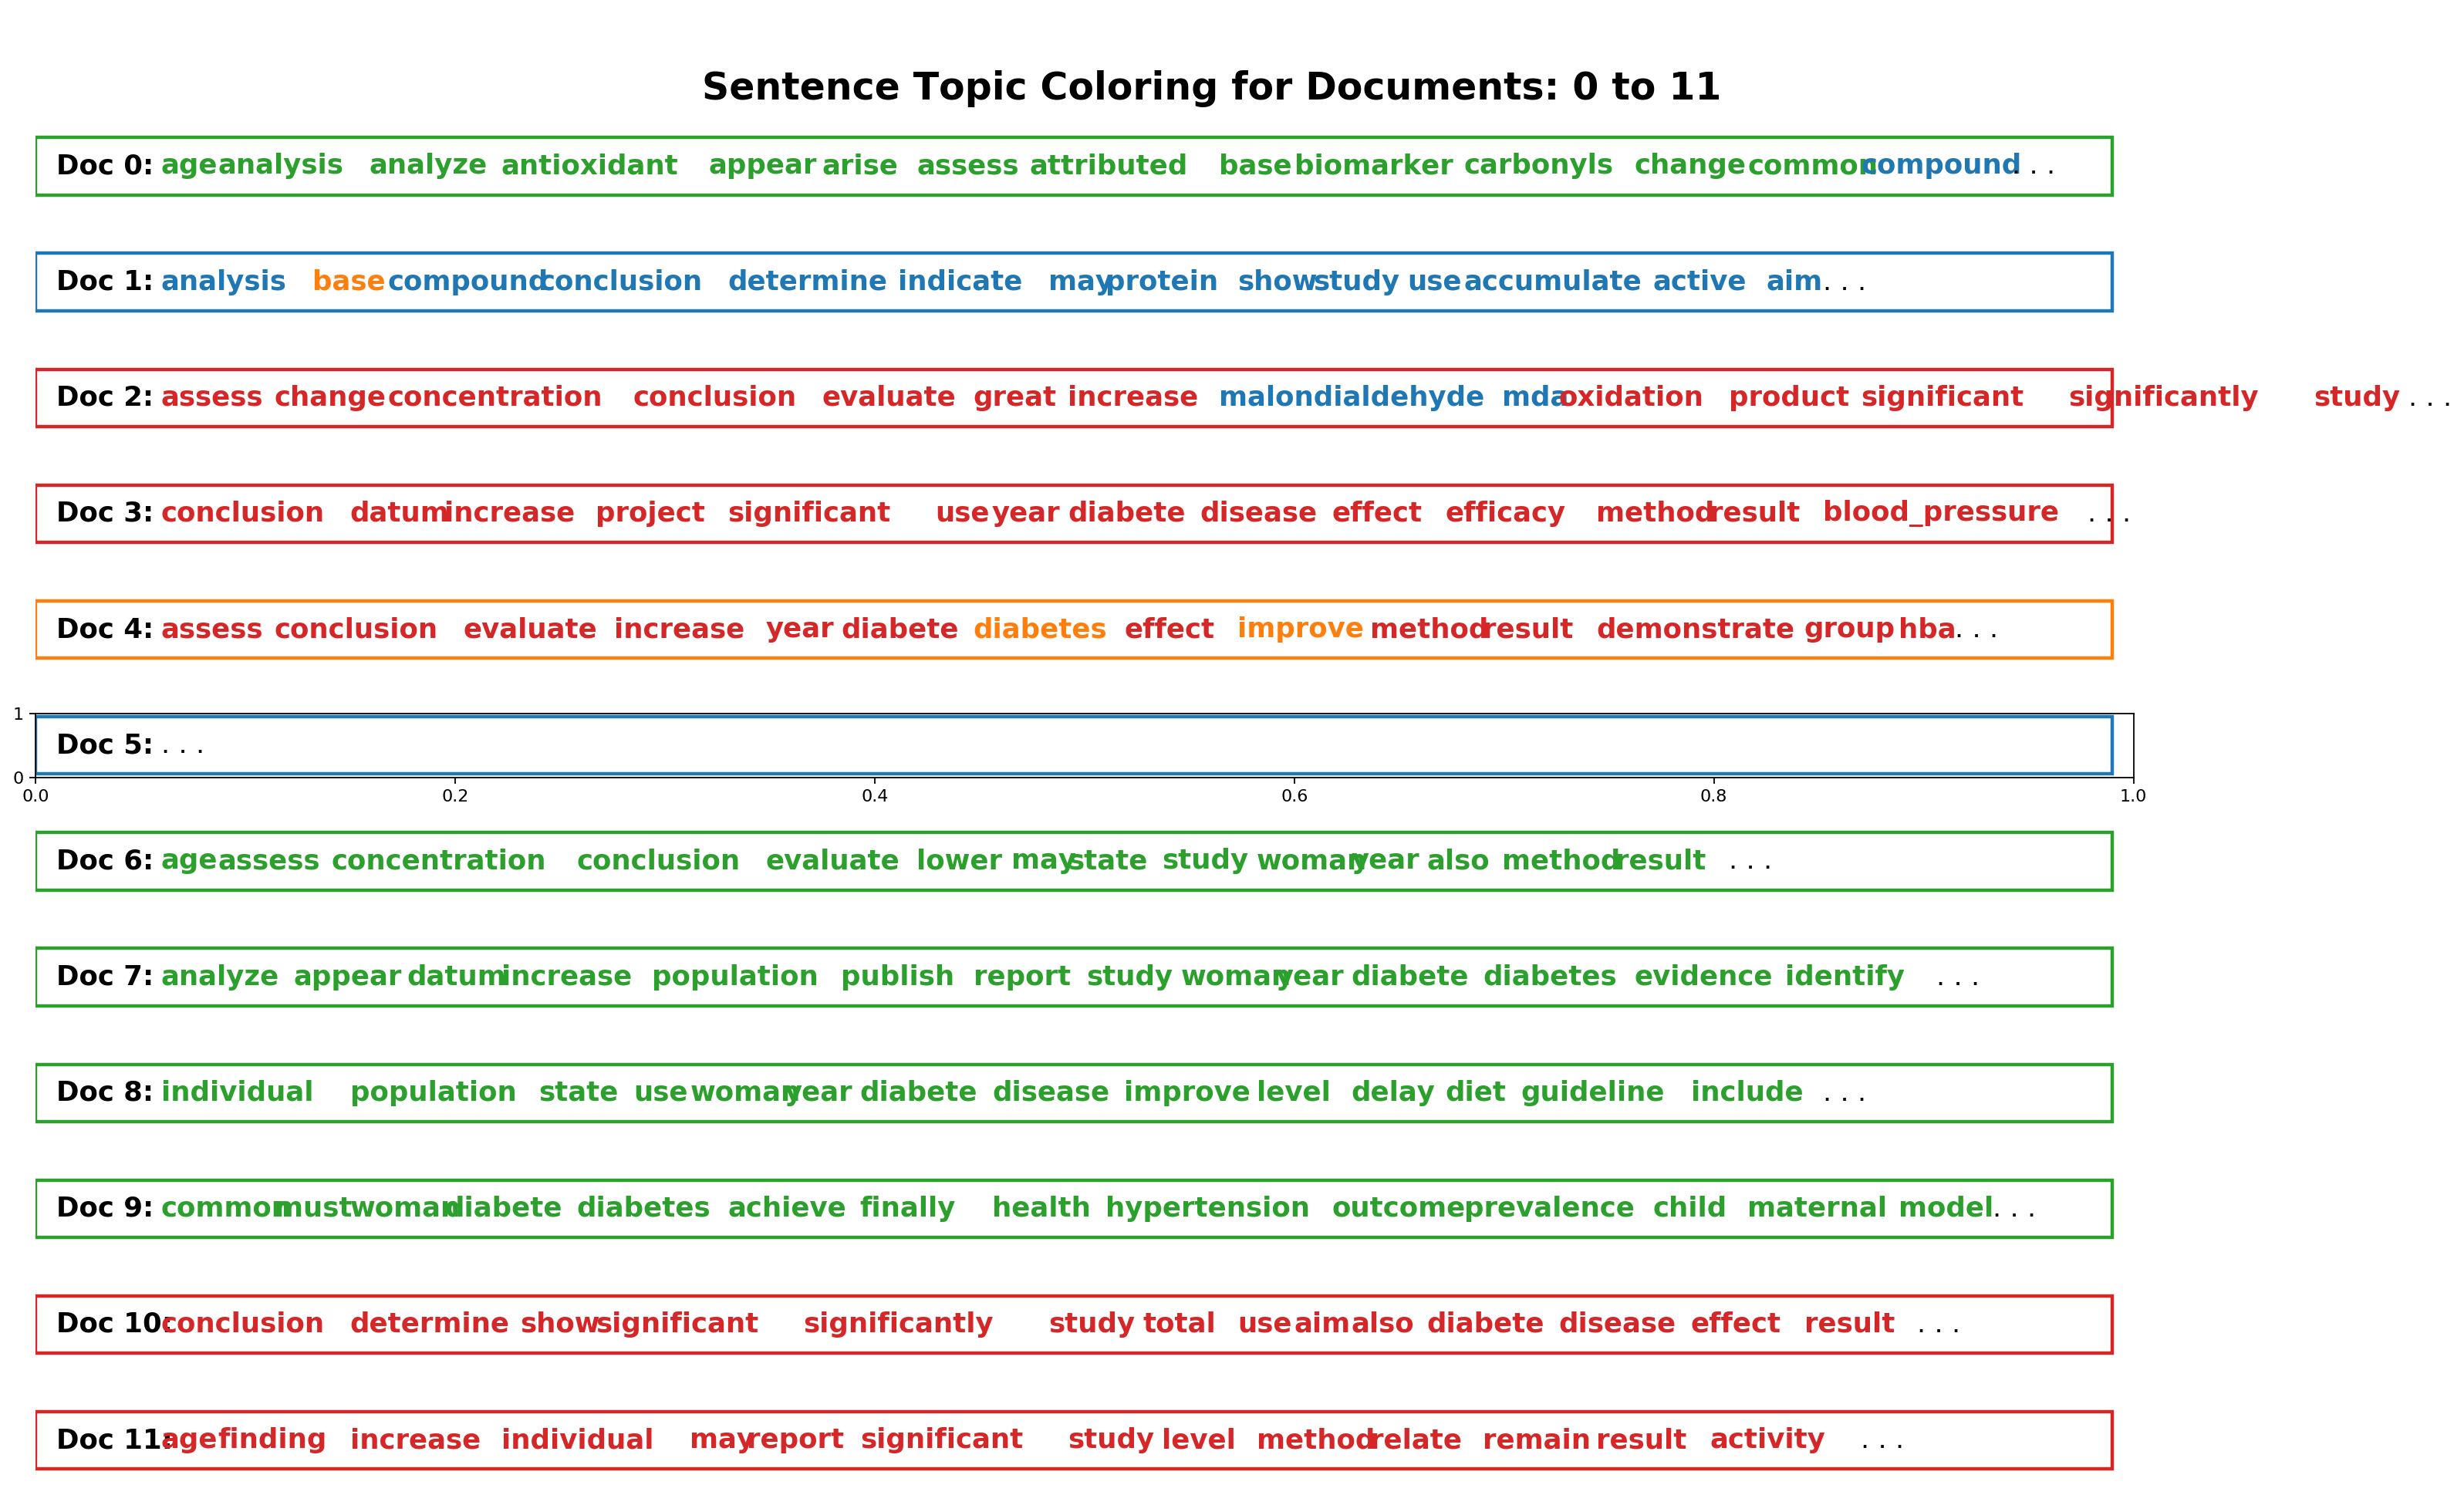

In [48]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()  

###What are the most discussed topics in the documents?

In [0]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

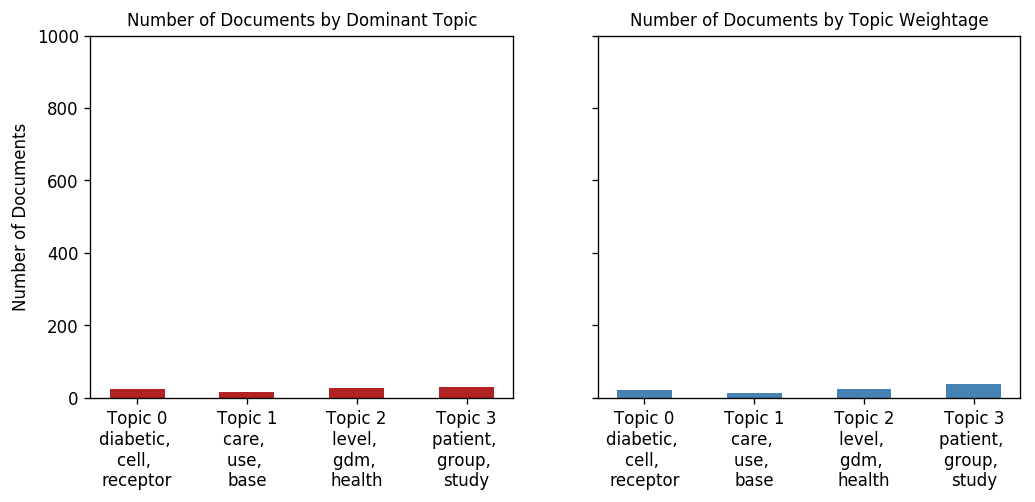

In [52]:

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

### t-SNE Clustering Chart

In [53]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 97 samples in 0.000s...
[t-SNE] Computed neighbors for 97 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 97 / 97
[t-SNE] Mean sigma: 0.271844
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.130489
[t-SNE] KL divergence after 1000 iterations: 0.096274


Loading BokehJS ...

###pyLDAvis

In [54]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.050224 -0.187088       1        1  39.671497
0     -0.194429  0.124864       2        1  24.615850
2      0.084615 -0.065266       3        1  23.334202
1      0.160038  0.127490       4        1  12.378449, topic_info=     Category        Freq         Term       Total  loglift  logprob
224   Default  241.000000      patient  241.000000  30.0000  30.0000
105   Default   67.000000     diabetic   67.000000  29.0000  29.0000
197   Default  108.000000        group  108.000000  28.0000  28.0000
2251  Default   43.000000          gdm   43.000000  27.0000  27.0000
386   Default   36.000000         care   36.000000  26.0000  26.0000
871   Default   35.000000         cell   35.000000  25.0000  25.0000
238   Default   99.000000         risk   99.000000  24.0000  24.0000
201   Default   57.000000       health   57.000000  23.0000  23.0000
1453  Default   31.000000     receptor   31.000000  22.0000  22.0000
498   Default   29.000000  weight_gain   29.000000  21.0000  21.0000
129   Default   76.000000        level   76.000000  20.0000  20.0000
8     Default   27.000000         base   27.000000  19.0000  19.0000
1440  Default   28.000000        mouse   28.000000  18.0000  18.0000
203   Default   91.000000         high   91.000000  17.0000  17.0000
318   Default   17.000000   prediabete   17.000000  16.0000  16.0000
360   Default   25.000000    pregnancy   25.000000  15.0000  15.0000
60    Default   26.000000      protein   26.000000  14.0000  14.0000
716   Default   25.000000   expression   25.000000  13.0000  13.0000
0     Default   69.000000          age   69.000000  12.0000  12.0000
2819  Default   24.000000   propionate   24.000000  11.0000  11.0000
398   Default   22.000000  gestational   22.000000  10.0000  10.0000
218   Default   61.000000          low   61.000000   9.0000   9.0000
84    Default   66.000000         year   66.000000   8.0000   8.0000
1297  Default   16.000000         test   16.000000   7.0000   7.0000
874   Default   20.000000     clinical   20.000000   6.0000   6.0000
658   Default   53.000000       factor   53.000000   5.0000   5.0000
587   Default   62.000000      insulin   62.000000   4.0000   4.0000
383   Default   21.000000       weight   21.000000   3.0000   3.0000
470   Default   24.000000      obesity   24.000000   2.0000   2.0000
722   Default   21.000000       induce   21.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
2855   Topic4    4.886569         team    5.547781   1.9623  -5.8850
2929   Topic4    4.884359     attitude    5.548555   1.9617  -5.8855
2944   Topic4    4.884359   perception    5.548555   1.9617  -5.8855
2453   Topic4    4.889108       africa    5.566795   1.9594  -5.8845
2460   Topic4    4.889108        nafld    5.566795   1.9594  -5.8845
1957   Topic4    4.542049      opacity    5.176709   1.9584  -5.9581
2882   Topic4    4.860855  obstruction    5.556687   1.9554  -5.8903
1624   Topic4    5.275254         cuff    6.031582   1.9552  -5.8085
1137   Topic4    5.077535         self    5.808309   1.9547  -5.8467
2477   Topic4    4.560131     decision    5.245929   1.9491  -5.9542
1297   Topic4   14.167373         test   16.329351   1.9472  -4.8206
2485   Topic4    4.228055         path    4.881695   1.9455  -6.0298
2543   Topic4    3.949920          han    4.607870   1.9351  -6.0978
2424   Topic4    4.999704         mode    5.880794   1.9269  -5.8621
669    Topic4    5.866021         many    6.981150   1.9152  -5.7023
386    Topic4   25.906376         care   36.241859   1.7535  -4.2170
247    Topic4   11.075093      support   14.265710   1.8361  -5.0668
8      Topic4   17.521683         base   27.869446   1.6251  -4.6081
874    Topic4   12.641257     clinical   20.066267   1.6271  -4.9345
831    Topic4   12.854594       system   22.070318   1.5487  -4.9178
2455   Topic4    7.092937       burden    9.8